## RawData Exploration

In [1]:
library(stringr)
library(dplyr)
library(tidyr)
library(ggplot2)
library(grid)
library(gridExtra)



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



ERROR: Error in library(gridExtra): there is no package called 'gridExtra'


In [6]:
raw_data <- read.csv('flipkart_com-ecommerce_sample.csv')

In [7]:
head(raw_data,5)

uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications


## Tidying Up Data

In [8]:
str_replace_all(raw_data$product_category_tree,"'","") -> raw_data$product_category_tree

In [10]:
head(raw_data$product_category_tree)

[1] "[\"Clothing >> Womens Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Womens Cycling Shorts\"]"
[2] "[\"Furniture >> Living Room Furniture >> Sofa Beds & Futons >> FabHomeDecor Fabric Double Sofa Bed (Finish Colo...\"]"           
[3] "[\"Footwear >> Womens Footwear >> Ballerinas >> AW Bellies\"]"                                                                   
[4] "[\"Clothing >> Womens Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Womens Cycling Shorts\"]"
[5] "[\"Pet Supplies >> Grooming >> Skin & Coat Care >> Shampoo >> Sicons All Purpose Arnica Dog Shampoo (500 ml)\"]"                 
[6] "[\"Eternal Gandhi Super Series Crystal Paper Weight...\"]"

In [11]:
Func <- function(X){
    XX <- str_extract_all(X, "[a-zA-Z]+") 
    Y <- XX[[1]]
    return (paste(Y[1:3],collapse=" "))
}

In [12]:
as.vector(sapply(raw_data$product_category_tree,Func)) -> raw_data$product_category_tree

In [14]:
separate(raw_data,product_category_tree,into=c("Col1","col2")) -> new_data

Warning message:
"Too many values at 20000 locations: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ..."

In [15]:
head(new_data)

uniq_id,crawl_timestamp,product_url,product_name,Col1,col2,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications


In [19]:
tail(sort(table(new_data$Col1),rev=T),20)


Sunglasses     Health    Cameras     Sports  Furniture       Bags       Pens 
        40         43         82        166        180        265        313 
      Toys      Tools       Baby    Watches  Computers    Kitchen     Beauty 
       330        391        483        530        578        647        710 
Automotive    Mobiles   Footwear       Home  Jewellery   Clothing 
      1012       1099       1227       1753       3531       6198 

In [22]:
c("Clothing","Jewellery","Home","Footwear","Mobiles","Automotive","Beauty","Kitchen","
Computers","Watches","Tools","Toys","Pens","Bags","Furniture","Sports") -> Selected

In [23]:
Checkpoint1 <- filter(new_data, Col1 %in% Selected)

In [24]:
head(Checkpoint1,5)

uniq_id,crawl_timestamp,product_url,product_name,Col1,col2,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications


In [25]:
subset(Checkpoint1,select= c("crawl_timestamp","Col1","retail_price","discounted_price","is_FK_Advantage_product","brand")) -> Checkpoint1

In [26]:
Fixed <- na.omit(Checkpoint1)

In [27]:
Func <-  function(x){
    return (substring(x,1,10))
}
Fixed$crawl_timestamp <- sapply(Fixed$crawl_timestamp,Func)

In [28]:
Func <- function(x){
    return (as.POSIXct(strptime(x,"%Y-%m-%d")))
}

Fixed$crawl_timestamp <- Func(Fixed$crawl_timestamp)

In [29]:
as.numeric(as.logical(Fixed$is_FK_Advantage_product)) -> Fixed$is_FK_Advantage_product

In [30]:
Fixed$Demand=Fixed$retail_price/Fixed$discounted_price

In [31]:
Without_Discount <- subset(Fixed,select=-c(discounted_price))

In [32]:
head(Without_Discount)

crawl_timestamp,Col1,retail_price,is_FK_Advantage_product,brand,Demand
2016-03-25,Clothing,999,0,Alisha,2.635884
2016-03-25,Furniture,32157,0,FabHomeDecor,1.419986
2016-03-25,Footwear,999,0,AW,2.002004
2016-03-25,Clothing,699,0,Alisha,2.617978
2016-03-25,Clothing,1199,0,Alisha,2.503132
2016-03-25,Furniture,32157,0,FabHomeDecor,1.419986


In [45]:
Without_Discount$brand <- as.factor(Without_Discount$brand)

In [46]:
Without_Discount$Col1 <- as.factor(Without_Discount$Col1)

In [47]:
str(Without_Discount)

'data.frame':	18292 obs. of  6 variables:
 $ crawl_timestamp        : POSIXct, format: "2016-03-25" "2016-03-25" ...
 $ Col1                   : Factor w/ 15 levels "Automotive","Bags",..: 4 6 5 4 4 6 5 4 5 4 ...
 $ retail_price           : int  999 32157 999 699 1199 32157 699 1199 1724 2299 ...
 $ is_FK_Advantage_product: num  0 0 0 0 0 0 0 0 0 0 ...
 $ brand                  : Factor w/ 3052 levels "","@home","1OAK",..: 122 821 274 122 122 1577 670 122 1505 452 ...
 $ Demand                 : num  2.64 1.42 2 2.62 2.5 ...


In [52]:
write.csv(Without_Discount,"withTimestamp.csv",row.names=F)

In [53]:
subset(Without_Discount,select=-c(crawl_timestamp)) -> With_Discount

In [59]:
write.csv(With_Discount,"withoutTimestamp.csv",row.names=F)

In [57]:
Train <- read.csv("withTimestamp.csv")
str(Train)

'data.frame':	18292 obs. of  6 variables:
 $ crawl_timestamp        : Factor w/ 125 levels "2015-12-01","2015-12-03",..: 43 43 43 43 43 43 43 43 43 43 ...
 $ Col1                   : Factor w/ 15 levels "Automotive","Bags",..: 4 6 5 4 4 6 5 4 5 4 ...
 $ retail_price           : int  999 32157 999 699 1199 32157 699 1199 1724 2299 ...
 $ is_FK_Advantage_product: int  0 0 0 0 0 0 0 0 0 0 ...
 $ brand                  : Factor w/ 3052 levels "","@home","1OAK",..: 122 821 274 122 122 1577 670 122 1505 452 ...
 $ Demand                 : num  2.64 1.42 2 2.62 2.5 ...


In [60]:
Train <- read.csv("withoutTimestamp.csv")
str(Train)

'data.frame':	18292 obs. of  5 variables:
 $ Col1                   : Factor w/ 15 levels "Automotive","Bags",..: 4 6 5 4 4 6 5 4 5 4 ...
 $ retail_price           : int  999 32157 999 699 1199 32157 699 1199 1724 2299 ...
 $ is_FK_Advantage_product: int  0 0 0 0 0 0 0 0 0 0 ...
 $ brand                  : Factor w/ 3052 levels "","@home","1OAK",..: 122 821 274 122 122 1577 670 122 1505 452 ...
 $ Demand                 : num  2.64 1.42 2 2.62 2.5 ...


# Model Formation and Save

In [61]:
lm(retail_price~.,data=Train) -> Fit

In [66]:
# make predictions
predictions <- predict(Fit, Train)
# summarize accuracy
mse <- mean((Train$retail_price - predictions)^2)

In [70]:
length(unique(predictions))

[1] 9485

In [111]:
write.csv(With_Discount,"Predictions.csv",row.names=F)

In [129]:
read.csv("Predictions.csv") -> Output

In [132]:
rbind(Output,c("Clothing",0,0,"A",223)) -> Output
as.numeric(Output$retail_price) -> Output$retail_price
as.numeric(Output$Demand) -> Output$Demand
as.integer(Output$is_FK_Advantage_product) -> Output$is_FK_Advantage_product
Output[is.na(Output)] <- ""
as.factor(Output$Col1) -> Output$Col1
as.factor(Output$brand) -> Output$brand

tail(Output)
head(Output)

Warning message in `[<-.factor`(`*tmp*`, ri, value = "A"):
"invalid factor level, NA generated"

,Col1,retail_price,is_FK_Advantage_product,brand,Demand
18289,Footwear,1099,0,,1.429129
18290,Footwear,2599,0,,3.336329
18291,Footwear,899,0,,1.000000
18292,Footwear,1799,0,,3.605210
18293,Clothing,0,0,,112.000000
18294,Clothing,0,0,,223.000000


Col1,retail_price,is_FK_Advantage_product,brand,Demand
Clothing,999,0,Alisha,2.635884
Furniture,32157,0,FabHomeDecor,1.419986
Footwear,999,0,AW,2.002004
Clothing,699,0,Alisha,2.617978
Clothing,1199,0,Alisha,2.503132
Furniture,32157,0,Local,1.419986


In [138]:
predict(Fit,Output[length(Output),])
predict(Fit,Output[4,])

5 
1000.287

4 
1020.941

In [140]:

save(Fit, file = "Final_Model.rda")

In [141]:
load("Final_Model.rda")
read.csv("Predictions.csv") -> Output
rbind(Output,c("Clothing",0,0,"A",223)) -> Output
as.numeric(Output$retail_price) -> Output$retail_price
as.numeric(Output$Demand) -> Output$Demand
as.integer(Output$is_FK_Advantage_product) -> Output$is_FK_Advantage_product
Output[is.na(Output)] <- ""
as.factor(Output$Col1) -> Output$Col1
as.factor(Output$brand) -> Output$brand

tail(Output)
head(Output)
predict(Fit,Output[length(Output),])

Warning message in `[<-.factor`(`*tmp*`, ri, value = "A"):
"invalid factor level, NA generated"

,Col1,retail_price,is_FK_Advantage_product,brand,Demand
18288,Footwear,1099,0,,1.222469
18289,Footwear,1099,0,,1.429129
18290,Footwear,2599,0,,3.336329
18291,Footwear,899,0,,1.000000
18292,Footwear,1799,0,,3.605210
18293,Clothing,0,0,,223.000000


Col1,retail_price,is_FK_Advantage_product,brand,Demand
Clothing,999,0,Alisha,2.635884
Furniture,32157,0,FabHomeDecor,1.419986
Footwear,999,0,AW,2.002004
Clothing,699,0,Alisha,2.617978
Clothing,1199,0,Alisha,2.503132
Furniture,32157,0,Local,1.419986


5 
1000.287

In [209]:
daily <- group_by(df, Months=months(crawl_timestamp),Col1)
MonthsData <- summarise(daily,Price=mean(retail_price),Demand=mean(Demand))
str(MonthsData)

Classes 'grouped_df', 'tbl_df', 'tbl' and 'data.frame':	100 obs. of  4 variables:
 $ Months: chr  "April" "April" "April" "April" ...
 $ Col1  : Factor w/ 15 levels "Automotive","Bags",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Price : num  1500 1373 1699 1970 1326 ...
 $ Demand: num  2.49 1.85 1.47 1.92 1.79 ...
 - attr(*, "vars")= chr "Months"
 - attr(*, "drop")= logi TRUE


In [143]:
df <- read.csv("withTimestamp.csv")
str(df)

'data.frame':	18292 obs. of  6 variables:
 $ crawl_timestamp        : Factor w/ 125 levels "2015-12-01","2015-12-03",..: 43 43 43 43 43 43 43 43 43 43 ...
 $ Col1                   : Factor w/ 15 levels "Automotive","Bags",..: 4 6 5 4 4 6 5 4 5 4 ...
 $ retail_price           : int  999 32157 999 699 1199 32157 699 1199 1724 2299 ...
 $ is_FK_Advantage_product: int  0 0 0 0 0 0 0 0 0 0 ...
 $ brand                  : Factor w/ 3052 levels "","@home","1OAK",..: 122 821 274 122 122 1577 670 122 1505 452 ...
 $ Demand                 : num  2.64 1.42 2 2.62 2.5 ...


In [145]:
Func <- function(x){
    return (as.POSIXct(strptime(x,"%Y-%m-%d")))
}

df$crawl_timestamp <- Func(df$crawl_timestamp)

### Plots and Visualization

Warning message:
"Removed 26 rows containing non-finite values (stat_boxplot)."

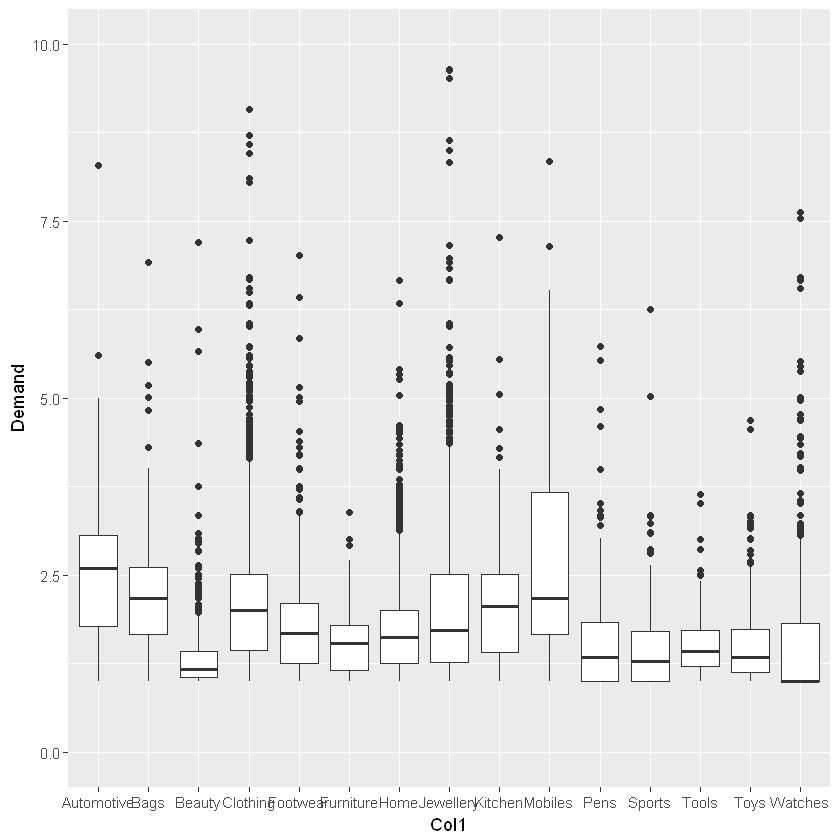

In [167]:
ggplot(aes(x=Col1,y=Demand),data=df)+geom_boxplot()+ylim(c(0,10))

Warning message:
"Removed 278 rows containing non-finite values (stat_boxplot)."

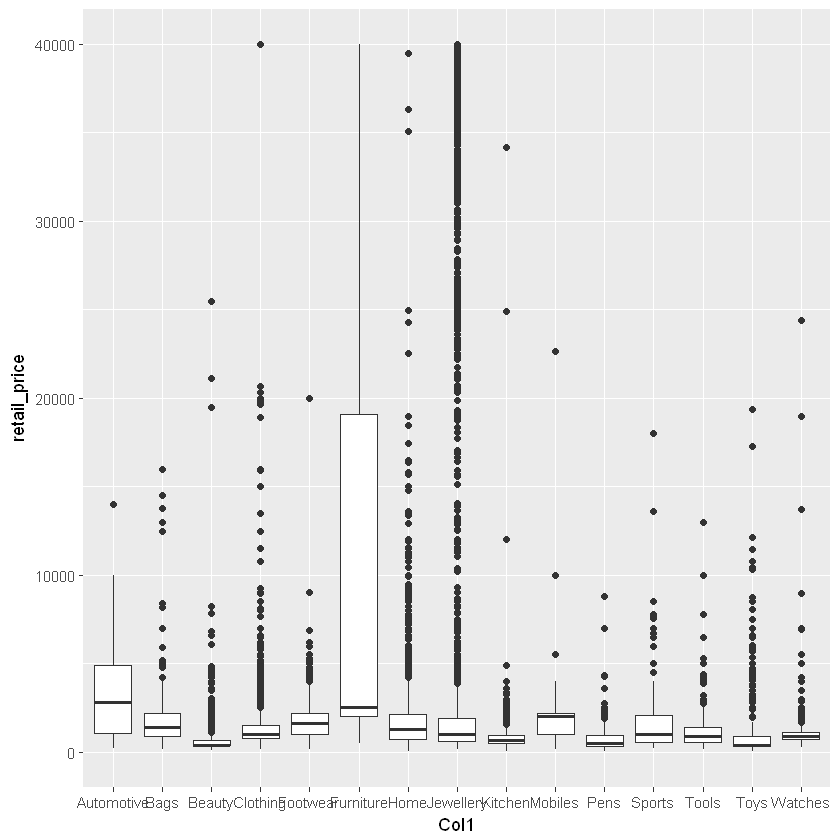

In [169]:
ggplot(aes(x=Col1,y=retail_price),data=df)+geom_boxplot()+ylim(c(0,40000))

Warning message:
"Removed 1171 rows containing missing values (geom_point)."

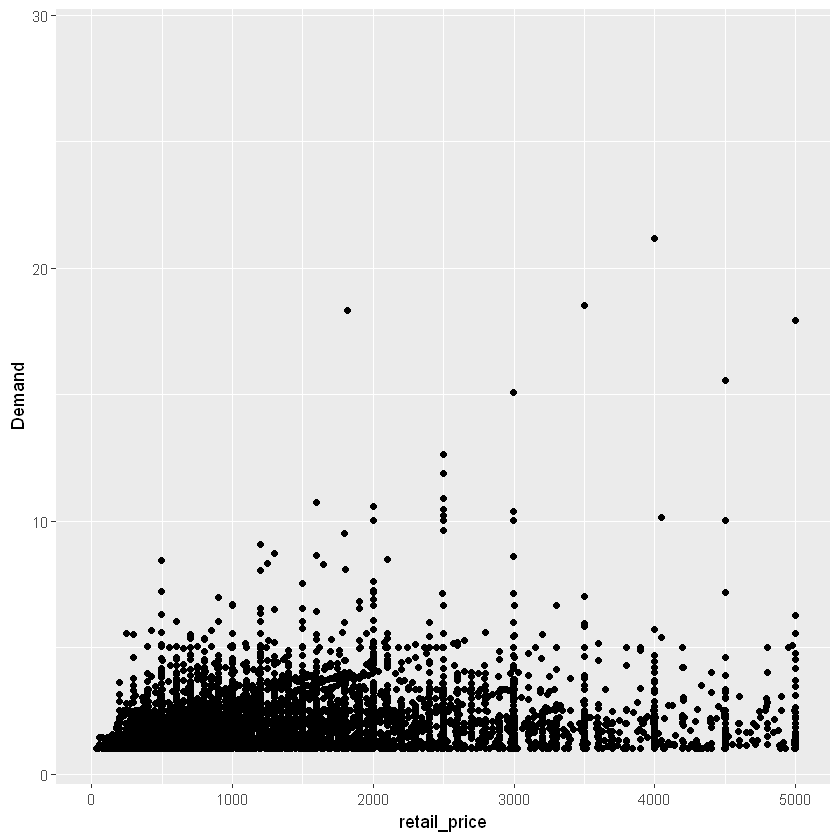

In [183]:
ggplot(aes(x=retail_price,y=Demand),data=df)+geom_point()+xlim(c(0,5000))

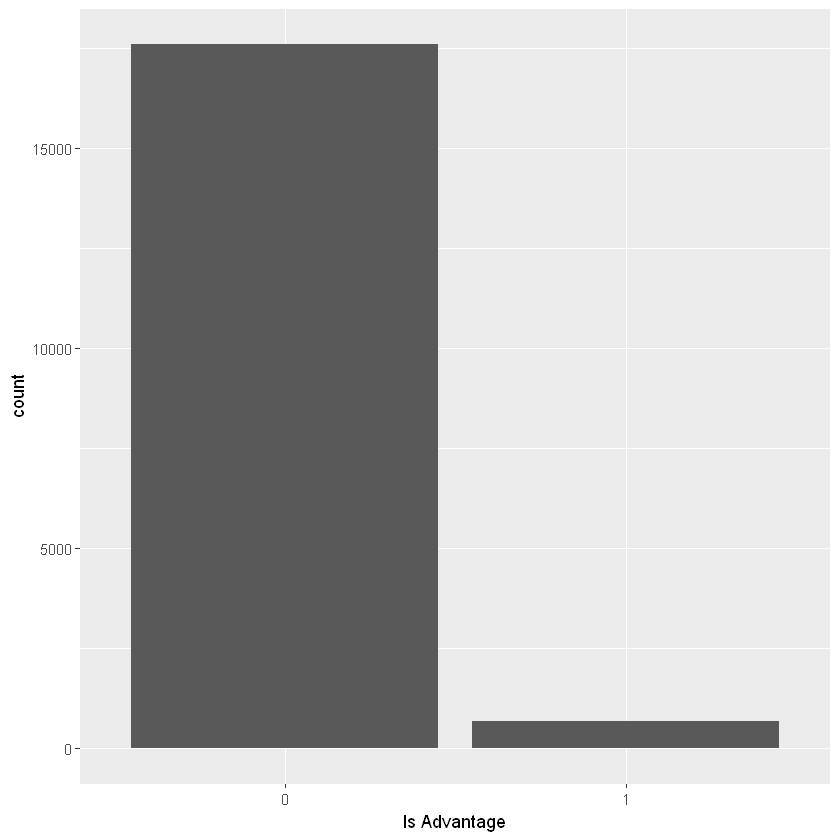

In [185]:
ggplot(aes(x=factor(is_FK_Advantage_product)),data=df)+geom_bar()+xlab("Is Advantage")

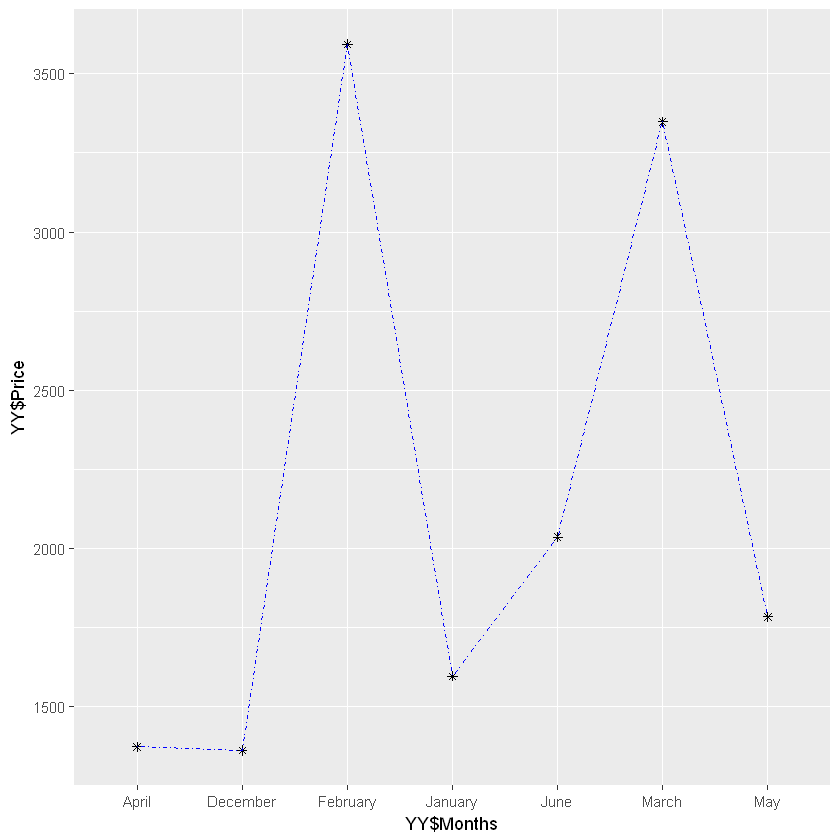

In [259]:
YY=subset(MonthsData,Col1==c("Bags"))
ggplot(aes(x=YY$Months,y=YY$Price,group=1),data=YY)+geom_point(shape=8)+geom_line(linetype="dotdash",color="blue")


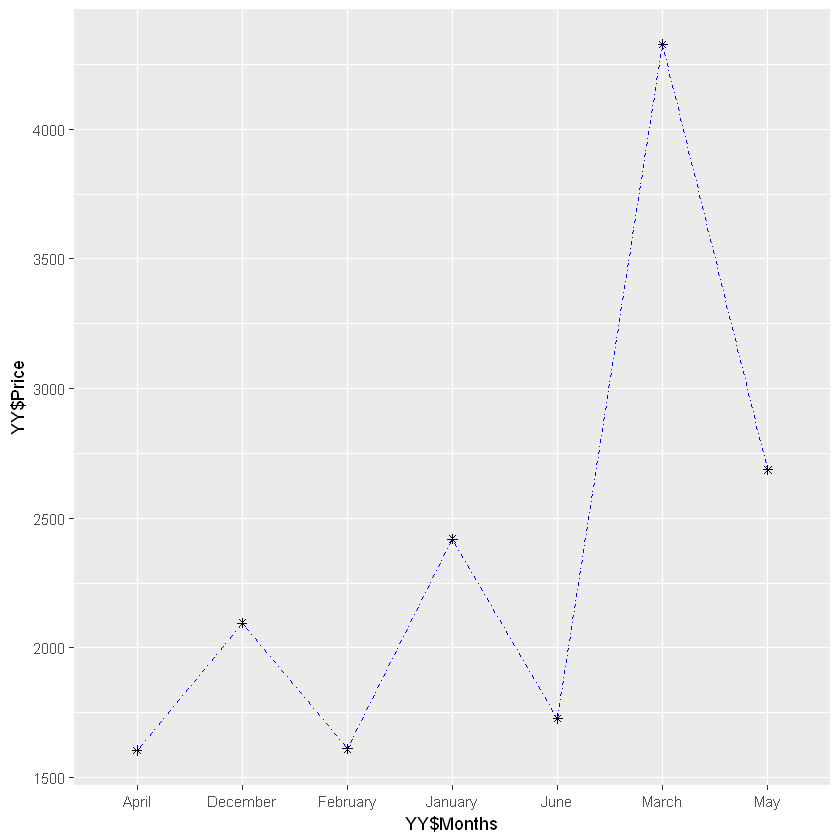

In [264]:
YY=subset(MonthsData,Col1==c("Home"))
ggplot(aes(x=YY$Months,y=YY$Price,group=1),data=YY)+geom_point(shape=8)+geom_line(linetype="dotdash",color="blue")


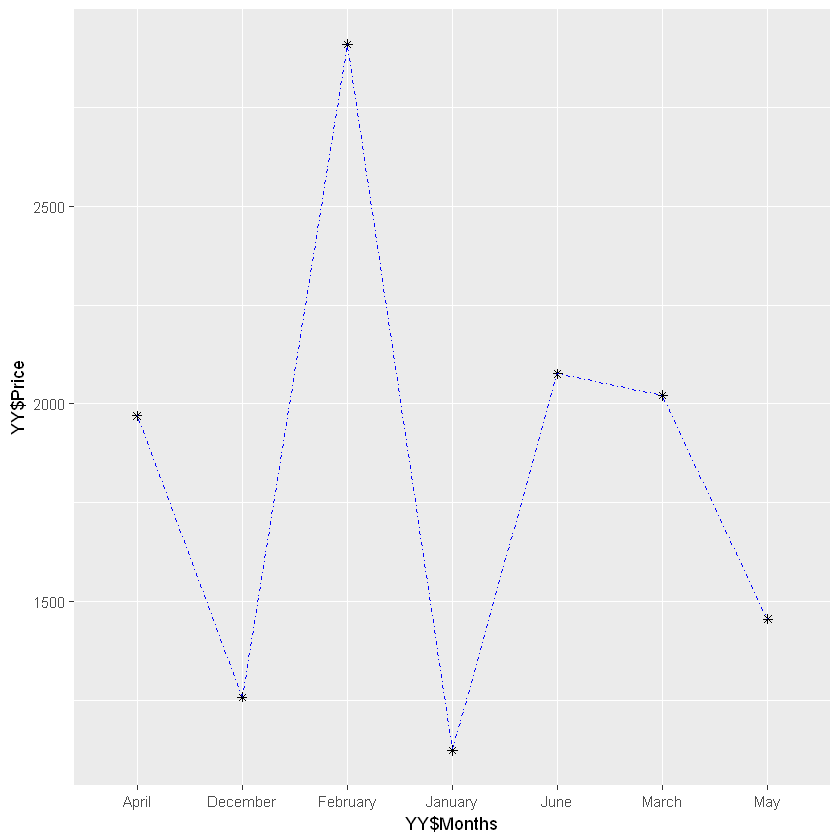

In [265]:
YY=subset(MonthsData,Col1==c("Clothing"))
ggplot(aes(x=YY$Months,y=YY$Price,group=1),data=YY)+geom_point(shape=8)+geom_line(linetype="dotdash",color="blue")


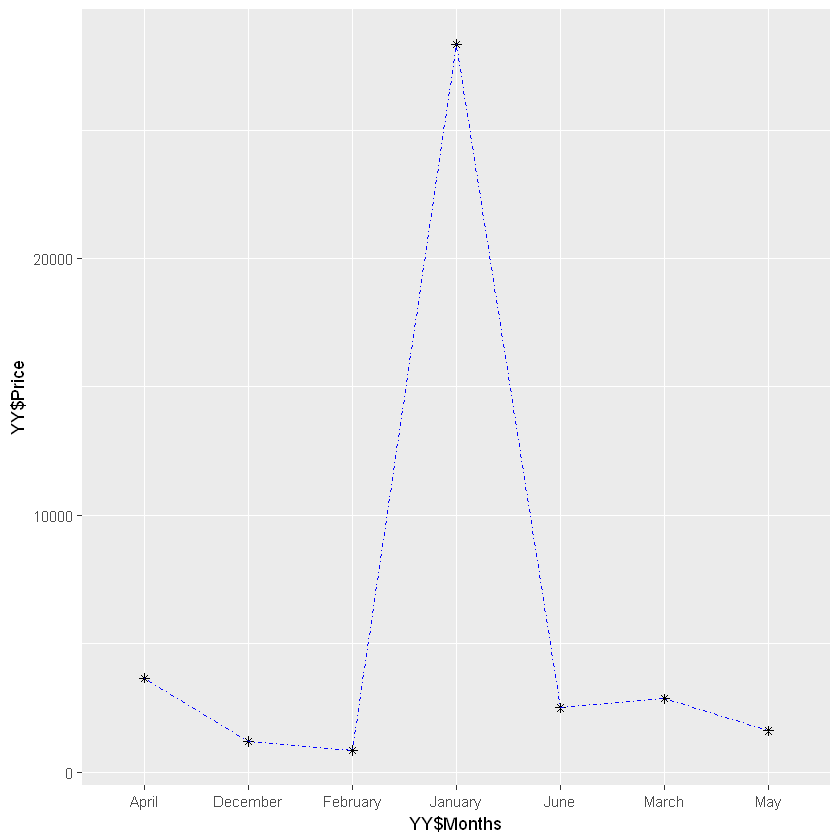

In [273]:
YY=subset(MonthsData,Col1==c("Jewellery"))
ggplot(aes(x=YY$Months,y=YY$Price,group=1),data=YY)+geom_point(shape=8)+geom_line(linetype="dotdash",color="blue") -> Plot1
Plot1

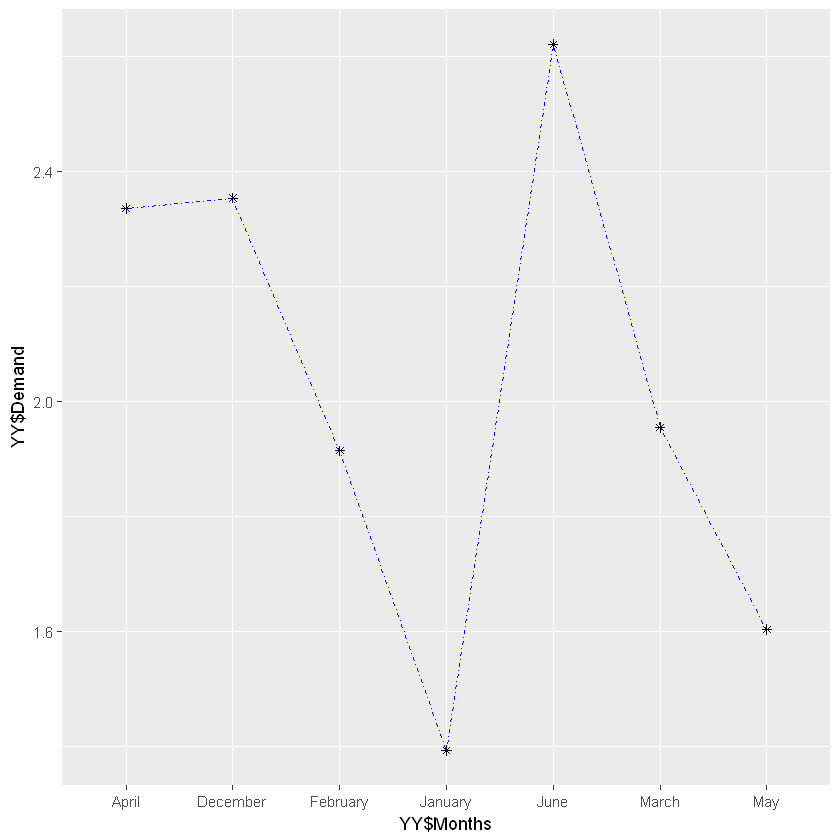

In [271]:
YY=subset(MonthsData,Col1==c("Jewellery"))
ggplot(aes(x=YY$Months,y=YY$Demand,group=1),data=YY)+geom_point(shape=8)+geom_line(linetype="dotdash",color="blue") -> Plot2
Plot2


In [287]:
write.csv(MonthsData,"HomeTable.csv",row.names=F)

In [ ]:
grid.Extra(plot1,plot2)